Title: Brain Stroke Prediction
---
Name: Saif Ahmmed Sifat

ID: 21101341

Section: CSE437 01

Group: 33


**DATA INSPECTION**
---
---

In [1]:
import pandas as pd

data = pd.read_csv('stroke_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [2]:
#Data types
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [3]:
# Checking for total NULL values
data.isnull().sum()

gender               2
age                  0
hypertension         0
heart_disease        0
ever_married         1
work_type            2
Residence_type       1
avg_glucose_level    1
bmi                  2
smoking_status       1
stroke               0
dtype: int64

In [4]:
# Checking rows with NULL values
nullRows = data[data.isnull().any(axis=1)]
print(nullRows)

      gender   age  hypertension  heart_disease ever_married      work_type  \
223      NaN  44.0             0              0          Yes       Govt_job   
342      NaN  26.0             0              0          Yes        Private   
883     Male  75.0             1              1          Yes  Self-employed   
987     Male  27.0             0              0           No        Private   
3508    Male  80.0             0              0          Yes  Self-employed   
3593  Female  45.0             0              0          Yes       Govt_job   
4544  Female  49.0             0              0          NaN        Private   
4565  Female  58.0             0              0          Yes            NaN   
4964  Female  78.0             0              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes            NaN   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
223           Urban              57.33  24.6           smo

In [5]:
#Values present for each column // except for the float and int
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    print("Unique values in:", col)
    print(data[col].unique(),"\n")

Unique values in: gender
['Male' 'Female' nan] 

Unique values in: ever_married
['Yes' 'No' nan 'yes' 'no'] 

Unique values in: work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Govtjob' 'Selfemployed'
 nan] 

Unique values in: Residence_type
['Urban' 'Rural' nan] 

Unique values in: smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown' nan] 



In [6]:
#dataset shape
data.shape

(4984, 11)

**Data Cleaning**
---
---

In [7]:
#gender column cleaning
unique_values_counts = data['gender'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')

print("Number of null values in 'gender' column before replacement:", data['gender'].isnull().sum(),'\n')
data = data.dropna(subset=['gender']) #drop row with gender value Null
print("Number of null values in 'gender' column after replacement:", data['gender'].isnull().sum(),'\n')
data.shape



Unique values with counts:
 gender
Female    2907
Male      2075
Name: count, dtype: int64 

Number of null values in 'gender' column before replacement: 2 

Number of null values in 'gender' column after replacement: 0 



(4982, 11)

In [8]:
#age column fixing
invalid_rows = data[data['age'] <= 0]

if invalid_rows.empty:
    print("There are no rows with age <= 0.")
else:
    print("Rows with age <= 0:\n", invalid_rows)

Rows with age <= 0:
      gender   age  hypertension  heart_disease ever_married work_type  \
3707   Male -10.0             0              0           No  children   

     Residence_type  avg_glucose_level   bmi smoking_status  stroke  
3707          Rural               95.8  17.3        Unknown       0  


In [9]:
#age prediction // using randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = data[['gender', 'ever_married', 'work_type']]
y = data['age']

preprocessor = ColumnTransformer(
    transformers=[
        ('age', OneHotEncoder(), ['gender', 'ever_married', 'work_type'])
    ])

X_encoded = preprocessor.fit_transform(X)

regressor = RandomForestRegressor()
regressor.fit(X_encoded, y)

parameters = {'gender': ['Male'], 'ever_married': ['No'], 'work_type': ['children']}
input_data = pd.DataFrame(parameters)


input_data_encoded = preprocessor.transform(input_data)


predicted_age = regressor.predict(input_data_encoded)

print("Predicted Age:", int(predicted_age[0]))

data.loc[data['age'] < 0, 'age'] = predicted_age

Predicted Age: 6


In [10]:
#age after column fixing
invalid_rows = data[data['age'] <= 0]

if invalid_rows.empty:
    print("There are no rows with age <= 0.")
else:
    print("Rows with age <= 0:\n", invalid_rows)

data['age']=data['age'].astype(int)


There are no rows with age <= 0.


In [11]:
#fixing ever_married column
unique_values_counts = data['ever_married'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')

data['ever_married'].replace({'yes': 'Yes', 'no': 'No'}, inplace=True)

unique_values_counts = data['ever_married'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')


Unique values with counts:
 ever_married
Yes    3279
No     1700
yes       1
no        1
Name: count, dtype: int64 

Unique values with counts:
 ever_married
Yes    3280
No     1701
Name: count, dtype: int64 



In [12]:
#detecting anomaly in hypertension column and fix
unique_values_counts = data['hypertension'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')

#replace the Value "2" with mode
mode = data.loc[data['hypertension'] != 2, 'hypertension'].mode()[0]
data.loc[data['hypertension'] == 2, 'hypertension'] = mode

unique_values_counts = data['hypertension'].value_counts()
print("Unique values with counts After fixing:\n", unique_values_counts,'\n')

Unique values with counts:
 hypertension
0    4501
1     480
2       1
Name: count, dtype: int64 

Unique values with counts After fixing:
 hypertension
0    4502
1     480
Name: count, dtype: int64 



In [13]:
#detecting anomaly in heart_disease column and fix
unique_values_counts = data['heart_disease'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')

# #replace the Value "3" with mode
mode = data.loc[data['heart_disease'] != 3, 'heart_disease'].mode()[0]
data.loc[data['heart_disease'] == 3, 'heart_disease'] = mode

unique_values_counts = data['heart_disease'].value_counts()
print("Unique values with counts After fixing:\n", unique_values_counts,'\n')

Unique values with counts:
 heart_disease
0    4705
1     276
3       1
Name: count, dtype: int64 

Unique values with counts After fixing:
 heart_disease
0    4706
1     276
Name: count, dtype: int64 



In [14]:
#Fixing Null values in ever_married

print("Number of null values in 'ever_married' column before cleaning:", data['ever_married'].isnull().sum(),'\n')
data = data.dropna(subset=['ever_married'])

print("Number of null values in 'ever_married' column after cleaning:", data['ever_married'].isnull().sum(),'\n')


Number of null values in 'ever_married' column before cleaning: 1 

Number of null values in 'ever_married' column after cleaning: 0 



In [15]:
#work_type column fixing
unique_values_counts = data['work_type'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')

print("Number of null values in 'work_type' column before cleaning:", data['work_type'].isnull().sum(),'\n')

null_row = data[data['work_type'].isnull()]

gender_age_ever_married_null = null_row[['gender', 'age','ever_married']]

gender_age_ever_married_null.head()


Unique values with counts:
 work_type
Private          2857
Self-employed     805
children          673
Govt_job          641
Govtjob             2
Selfemployed        1
Name: count, dtype: int64 

Number of null values in 'work_type' column before cleaning: 2 



,gender,age,ever_married
4565,Female,58,Yes
4979,Male,40,Yes


In [16]:
# #work_type fixing (2) //Creating df1 dataframe based on the column age, gender, ever_married and work_type
df1 = pd.concat([data[['age']], data[['gender']], data[['ever_married']], data[['work_type']]], axis=1)
df1 = df1[df1['work_type'].notnull()]

df1.head()

,age,gender,ever_married,work_type
0,67,Male,Yes,Private
1,80,Male,Yes,Private
2,49,Female,Yes,Private
3,79,Female,Yes,Self-employed
4,81,Male,Yes,Private


In [17]:
#using the decision tree for work-type prediction // hardcoded 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df1[['age', 'gender','ever_married']]

X = pd.get_dummies(X, columns=['gender','ever_married'], drop_first=True)

y = df1['work_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

data_to_predict = pd.DataFrame({'age': [58], 'gender_Male': [False], 'ever_married_Yes': [True]})

predicted_ever_married = classifier.predict(data_to_predict)

print("Predicted ever_married status:", predicted_ever_married[0])
#replace
data.loc[(data['age'] == 58) & (data['gender'] == 'Female') & (data['ever_married'] == 'Yes'), 'work_type'] = predicted_ever_married[0]


#check
null_row = data[data['work_type'].isnull()]

gender_age_ever_married_null = null_row[['gender', 'age','ever_married']]

gender_age_ever_married_null.head()



Accuracy: 0.679718875502008
Predicted ever_married status: Private


,gender,age,ever_married
4979,Male,40,Yes


In [18]:
#using the decision tree for work-type prediction // hardcoded 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df1[['age', 'gender','ever_married']]

X = pd.get_dummies(X, columns=['gender','ever_married'], drop_first=True)

y = df1['work_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

data_to_predict = pd.DataFrame({'age': [40], 'gender_Male': [True], 'ever_married_Yes': [True]})

predicted_ever_married = classifier.predict(data_to_predict)

print("Predicted ever_married status:", predicted_ever_married[0])
#replace
data.loc[(data['age'] == 40) & (data['gender'] == 'Male') & (data['ever_married'] == 'Yes'), 'work_type'] = predicted_ever_married[0]


#check
null_row = data[data['work_type'].isnull()]

gender_age_ever_married_null = null_row[['gender', 'age','ever_married']]

gender_age_ever_married_null.head()

Accuracy: 0.679718875502008
Predicted ever_married status: Private


,gender,age,ever_married


In [19]:
#Residence_type column cleaning
unique_values_counts = data['Residence_type'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')

print("Number of null values in 'Residence_type' column before cleaning:", data['Residence_type'].isnull().sum(),'\n')
data = data.dropna(subset=['Residence_type'])
print("Number of null values in 'Residence_type' column after cleaning:", data['Residence_type'].isnull().sum(),'\n')


Unique values with counts:
 Residence_type
Urban    2531
Rural    2449
Name: count, dtype: int64 

Number of null values in 'Residence_type' column before cleaning: 1 

Number of null values in 'Residence_type' column after cleaning: 0 



In [20]:
#Replacing avg_glucose_level with mean
print("Number of null values in 'avg_glucose_level' column before cleaning:", data['avg_glucose_level'].isnull().sum(),'\n')

mean = data.loc[data['avg_glucose_level'].notnull(), 'avg_glucose_level'].mean()

#replace
data['avg_glucose_level'].fillna(mean, inplace=True)

print("Number of null values in 'avg_glucose_level' column after cleaning:", data['avg_glucose_level'].isnull().sum(),'\n')


Number of null values in 'avg_glucose_level' column before cleaning: 1 

Number of null values in 'avg_glucose_level' column after cleaning: 0 



In [21]:
#Replacing bmi with mean
print("Number of null values in 'bmi' column before cleaning:", data['bmi'].isnull().sum(),'\n')

mean = data.loc[data['bmi'].notnull(), 'bmi'].mean()

#replace
data['bmi'].fillna(mean, inplace=True)

print("Number of null values in 'bmi' column after cleaning:", data['bmi'].isnull().sum(),'\n')


Number of null values in 'bmi' column before cleaning: 2 

Number of null values in 'bmi' column after cleaning: 0 



In [22]:
#smoking_status cleaning 
unique_values_counts = data['smoking_status'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')

print("Number of null values in 'smoking_status' column before cleaning:", data['smoking_status'].isnull().sum(),'\n')
data = data.dropna(subset=['smoking_status'])
print("Number of null values in 'smoking_status' column after cleaning:", data['smoking_status'].isnull().sum(),'\n')

Unique values with counts:
 smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              774
Name: count, dtype: int64 

Number of null values in 'smoking_status' column before cleaning: 1 

Number of null values in 'smoking_status' column after cleaning: 0 



In [23]:
#detecting anomaly in stroke column and fix
unique_values_counts = data['stroke'].value_counts()
print("Unique values with counts:\n", unique_values_counts,'\n')

Unique values with counts:
 stroke
0    4729
1     250
Name: count, dtype: int64 



In [24]:
#remove duplicate data
duplicate_data_count = data.duplicated().sum()
print("Total Duplicate Row before dropping: ",duplicate_data_count)
data=data.drop_duplicates()

duplicate_data_count = data.duplicated().sum()
print("Total Duplicate Row after dropping: ",duplicate_data_count)


Total Duplicate Row before dropping:  3
Total Duplicate Row after dropping:  0


In [25]:
#Check after cleaning
nullRows = data[data.isnull().any(axis=1)]
print(nullRows)
data.isnull().sum()

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

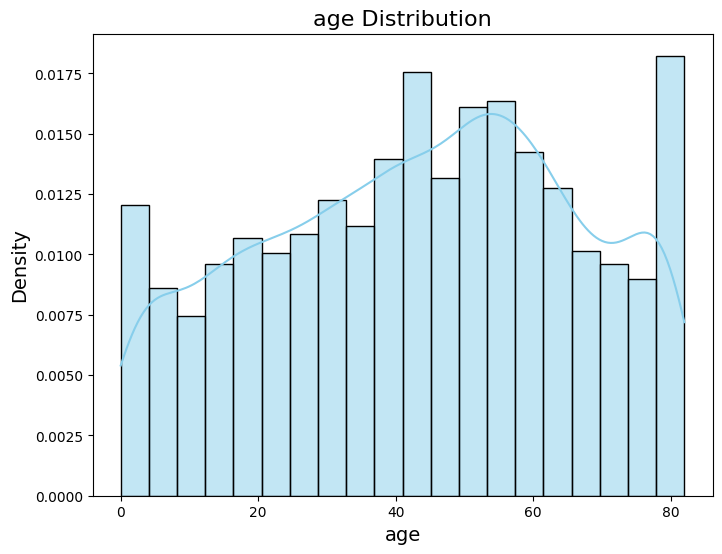

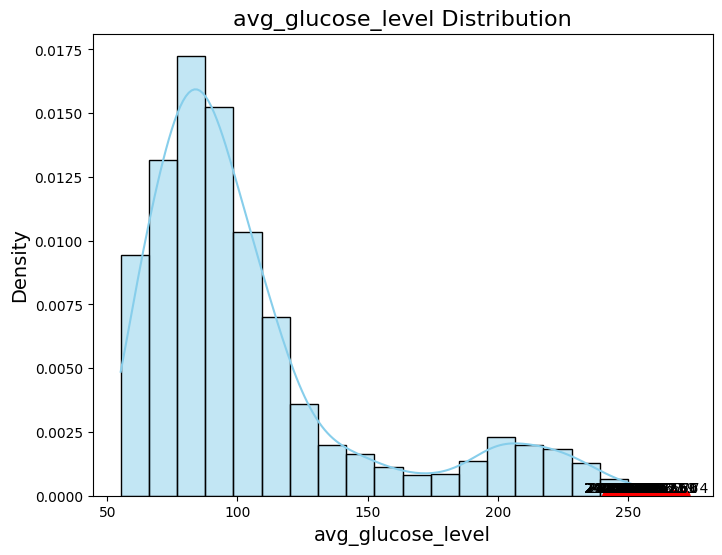

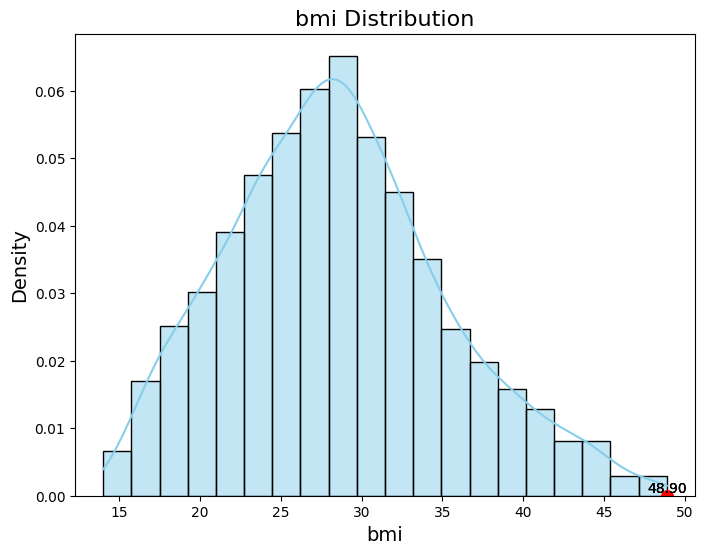

Outliers for 'age': []
Outliers for 'avg_glucose_level': [252.72, 243.58, 259.63, 249.31, 263.32, 271.74, 242.52, 250.89, 247.51, 243.53, 242.3, 243.5, 251.6, 247.69, 250.2, 254.6, 254.63, 246.34, 251.46, 267.76, 246.53, 244.28, 251.99, 253.16, 242.84, 249.29, 242.94, 247.48, 266.59, 243.59, 250.8, 255.17, 267.61, 248.37, 263.56, 247.97, 248.24, 254.95, 247.87, 261.67, 256.74, 244.3, 242.62, 243.52, 267.6, 253.86, 243.73, 260.85, 253.93]
Outliers for 'bmi': [48.9, 48.9, 48.9]


(4976, 11)

In [26]:
#outliner of bmi, avg_glucose_level and age
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

outliers_age = []
outliers_glucose_level = []
outliers_bmi = []

numerical_variables = ['age', 'avg_glucose_level', 'bmi']


def detect_outliers_zscore(values):
    z_scores = (values - values.mean()) / values.std()
    return np.abs(z_scores) > 3

outliers = data[numerical_variables].apply(detect_outliers_zscore)

for variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[variable], bins=20, kde=True, color='skyblue', stat='density')
    plt.title(f'{variable} Distribution', fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel('Density', fontsize=14)

    outliers_variable = data[variable][outliers[variable]]
    if not outliers_variable.empty:
        plt.plot(outliers_variable, np.zeros_like(outliers_variable), 'ro', markersize=8)
        if variable == 'age':
            outliers_age.extend(outliers_variable.tolist())
        elif variable == 'avg_glucose_level':
            outliers_glucose_level.extend(outliers_variable.tolist())
        elif variable == 'bmi':
            outliers_bmi.extend(outliers_variable.tolist())


        for x, y in zip(outliers_variable, np.zeros_like(outliers_variable)):
            plt.text(x, y, f'{x:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.show()


print("Outliers for 'age':", outliers_age)
print("Outliers for 'avg_glucose_level':", outliers_glucose_level)
print("Outliers for 'bmi':", outliers_bmi)
data.shape

In [27]:
#outliner avg_glucose_level Remove
for outlier_value in outliers_glucose_level:
    for index, value in data['avg_glucose_level'].items():
        if value == outlier_value:
            data.drop(index, inplace=True)

data.shape


(4927, 11)

In [28]:
#outliner bmi Remove
for outlier_value in outliers_bmi:
    for index, value in data['bmi'].items():
        if value == outlier_value:
            data.drop(index, inplace=True)

data.shape

(4924, 11)

**Data Encoding**
---
---

In [29]:
#categorizing age

def categorize_age(age):
    if age < 18:
        return 'Children'
    elif 18 <= age < 30:
        return 'Young Adults'
    elif 30 <= age < 65:
        return 'Adults'
    else:
        return 'Seniors'

data['age_group'] = data['age'].apply(categorize_age)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Seniors
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Seniors
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adults
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Seniors
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Seniors


In [30]:
#categorizing avg_glucose_level
glucose_bins = [0, 70, 100, 125, float('inf')]
glucose_labels = ['Low', 'Normal', 'High', 'Very High']
data['glucose_level_range'] = pd.cut(data['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_level_range
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Seniors,Very High
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Seniors,High
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adults,Very High
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Seniors,Very High
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Seniors,Very High


In [31]:
#categorizing bmi

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['bmi_category'] = data['bmi'].apply(categorize_bmi)

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_level_range,bmi_category
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Seniors,Very High,Obese
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Seniors,High,Obese
2,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adults,Very High,Obese
3,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Seniors,Very High,Normal Weight
4,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Seniors,Very High,Overweight


In [32]:
#Encoding data
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

one_hot_encoded_data = pd.get_dummies(data, columns = [ 'work_type', 'smoking_status'])
encoded_data = one_hot_encoded_data

encoded_data["gender"] = enc.fit_transform(data['gender'])
encoded_data["ever_married"] = enc.fit_transform(data["ever_married"])
encoded_data["Residence_type"] = enc.fit_transform(data["Residence_type"])
encoded_data["bmi_category"] = enc.fit_transform(data["bmi_category"])
encoded_data["age_group"] = enc.fit_transform(data["age_group"])
encoded_data["glucose_level_range"] = enc.fit_transform(data["glucose_level_range"])

encoded_data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,...,work_type_Govt_job,work_type_Govtjob,work_type_Private,work_type_Self-employed,work_type_Selfemployed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228.69,36.6,1,2,...,False,False,True,False,False,False,False,True,False,False
1,1,80,0,1,1,0,105.92,32.5,1,2,...,False,False,True,False,False,False,False,False,True,False
2,0,49,0,0,1,1,171.23,34.4,1,0,...,False,False,True,False,False,False,False,False,False,True
3,0,79,1,0,1,0,174.12,24.0,1,2,...,False,False,False,True,False,False,False,False,True,False
4,1,81,0,0,1,1,186.21,29.0,1,2,...,False,False,True,False,False,False,False,True,False,False


<Axes: >

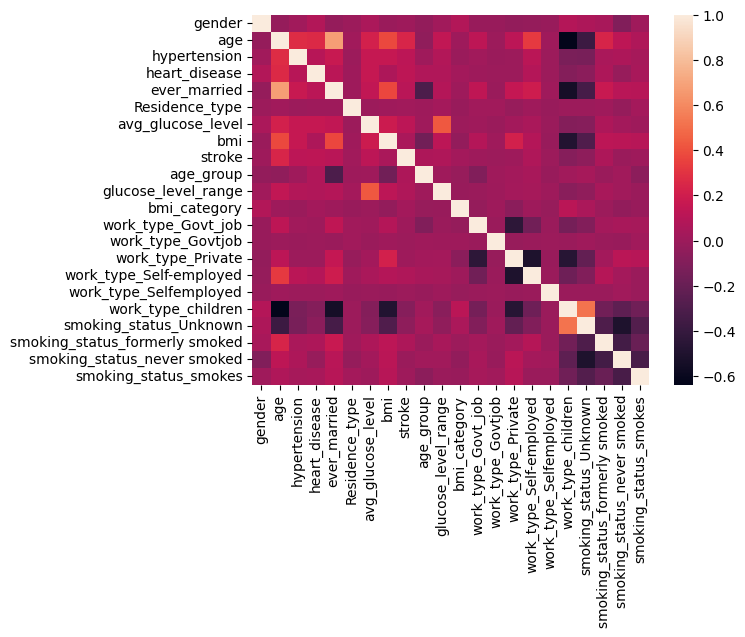

In [33]:
import seaborn as sns
co = encoded_data.corr()
sns.heatmap(co)

In [34]:
Y = pd.DataFrame(encoded_data['stroke'])
Y.head

<bound method NDFrame.head of       stroke
0          1
1          1
2          1
3          1
4          1
...      ...
4976       0
4977       0
4978       0
4979       0
4980       0

[4924 rows x 1 columns]>

In [35]:
encoded_data.drop('stroke', axis = 1, inplace = True)

X=encoded_data

X.head

<bound method NDFrame.head of       gender  age  hypertension  heart_disease  ever_married  Residence_type  \
0          1   67             0              1             1               1   
1          1   80             0              1             1               0   
2          0   49             0              0             1               1   
3          0   79             1              0             1               0   
4          1   81             0              0             1               1   
...      ...  ...           ...            ...           ...             ...   
4976       1   41             0              0             0               0   
4977       1   40             0              0             1               1   
4978       0   45             1              0             1               0   
4979       1   40             0              0             1               0   
4980       0   80             1              0             1               1   

      avg

In [36]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Define the target variable y
y = data['stroke']  # Replace 'stroke' with your actual target variable name

# Features provided
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type',
                        'bmi_category', 'age_group', 'work_type_Govt_job', 'work_type_Private',
                        'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown',
                        'smoking_status_formerly smoked', 'smoking_status_never smoked',
                        'smoking_status_smokes']

numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Select top 10 categorical features using chi-square
k_best_categorical = SelectKBest(score_func=chi2, k=10)
X_cat_selected = k_best_categorical.fit_transform(X[categorical_features], y)

# Select top 5 numerical features using mutual information
k_best_numerical = SelectKBest(score_func=mutual_info_classif, k=3)
X_num_selected = k_best_numerical.fit_transform(X[numerical_features], y)

# Get selected feature names
selected_categorical_feature_names = X[categorical_features].columns[k_best_categorical.get_support(indices=True)]
selected_numerical_feature_names = X[numerical_features].columns[k_best_numerical.get_support(indices=True)]

print("Selected Categorical Features:")
print(selected_categorical_feature_names)

print("\nSelected Numerical Features:")
print(selected_numerical_feature_names)

Selected Categorical Features:
Index(['hypertension', 'heart_disease', 'ever_married', 'Residence_type',
       'bmi_category', 'age_group', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked'],
      dtype='object')

Selected Numerical Features:
Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')


In [37]:
X.drop(['gender', 'hypertension', 'bmi_category', 'work_type_Govt_job', 'work_type_Private',
        'smoking_status_never smoked', 'smoking_status_smokes'], axis=1, inplace=True)
X

,age,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,glucose_level_range,work_type_Govtjob,work_type_Self-employed,work_type_Selfemployed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked
0,67,1,1,1,228.69,36.6,2,3,False,False,False,False,False,True
1,80,1,1,0,105.92,32.5,2,0,False,False,False,False,False,False
2,49,0,1,1,171.23,34.4,0,3,False,False,False,False,False,False
3,79,0,1,0,174.12,24.0,2,3,False,True,False,False,False,False
4,81,0,1,1,186.21,29.0,2,3,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41,0,0,0,70.15,29.8,0,2,False,False,False,False,False,True
4977,40,0,1,1,191.15,31.1,0,3,False,False,False,False,False,False
4978,45,0,1,0,95.02,31.8,0,2,False,False,False,False,False,False
4979,40,0,1,0,83.94,30.0,0,2,False,False,False,False,False,False


**Train and Test**
---
---

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.30)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit only on training data
scaler.fit(X_train)

# Transform both train and test using the same scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


**KNN Classifier**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score


knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

knn_accuracy = knn.score(X_test, y_test)
precision = precision_score(y_test, knn_predictions)
recall = recall_score(y_test, knn_predictions)

print("KNN Accuracy:", knn_accuracy)
print("Precision:", precision)
print("Recall:", recall)

KNN Accuracy: 0.9472259810554804
Precision: 0.1111111111111111
Recall: 0.014084507042253521


C:\Users\sefat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


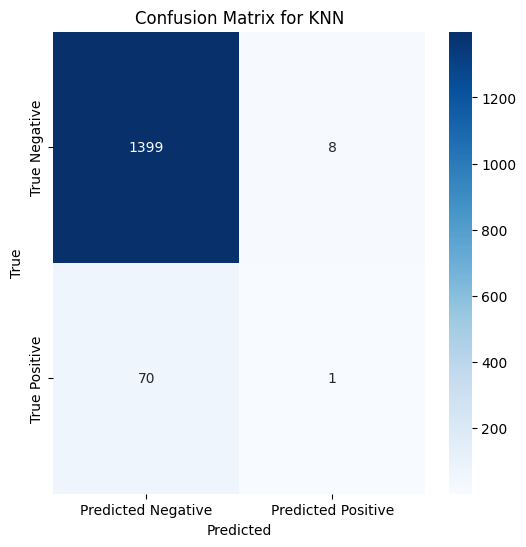

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

**Random Forest Classifier**


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=30, class_weight='balanced')
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Calculation
rf_accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Precision:", precision)
print("Recall:", recall)


C:\Users\sefat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.9479025710419485
Precision: 0.0
Recall: 0.0


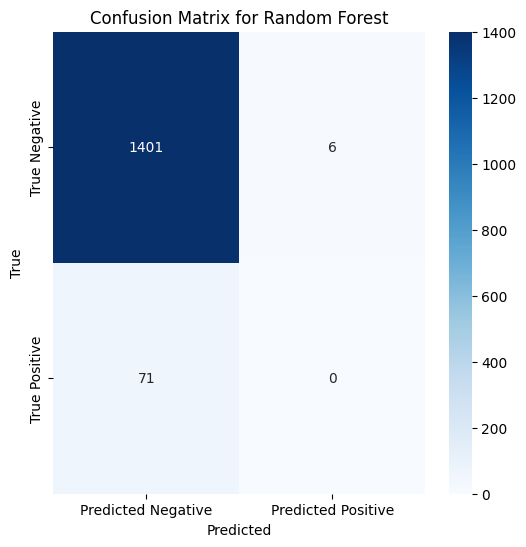

In [43]:
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.show()

**SVM**

In [44]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear',random_state=32, class_weight='balanced')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Calculation
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision  = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)

print("SVM Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)

SVM Accuracy: 0.6928281461434371
Precision: 0.12079207920792079
Recall: 0.8591549295774648


C:\Users\sefat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


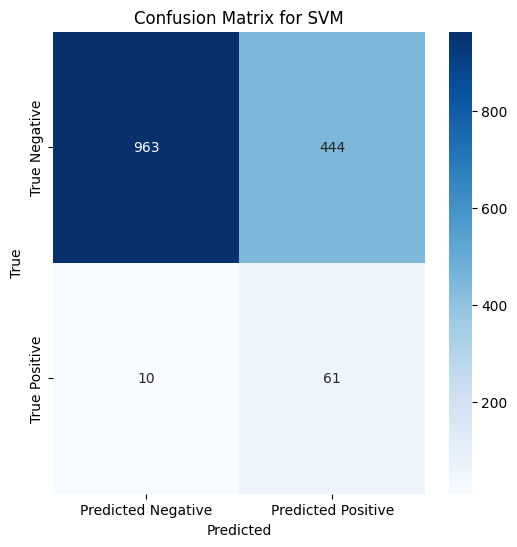

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM")
plt.show()

**Decision Tree / Regression tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=100 , class_weight='balanced')
dt_classifier.fit(X_train,y_train)
dt_predictions = dt_classifier.predict(X_test)

# Calculation
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision  = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)

Decision Tree Accuracy: 0.922192151556157
Precision: 0.16666666666666666
Recall: 0.15492957746478872


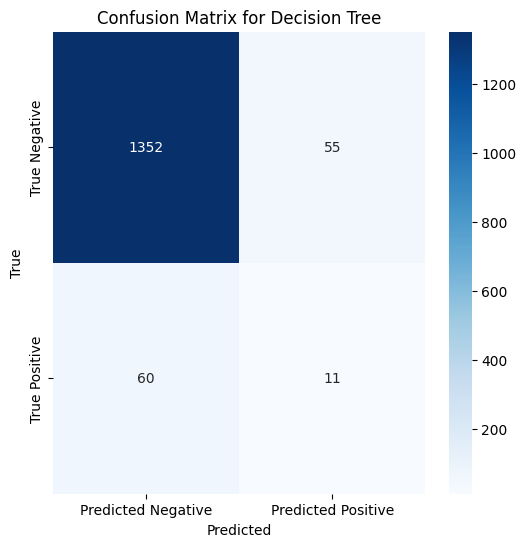

In [47]:
cm = confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

Model Accuracy Compare 

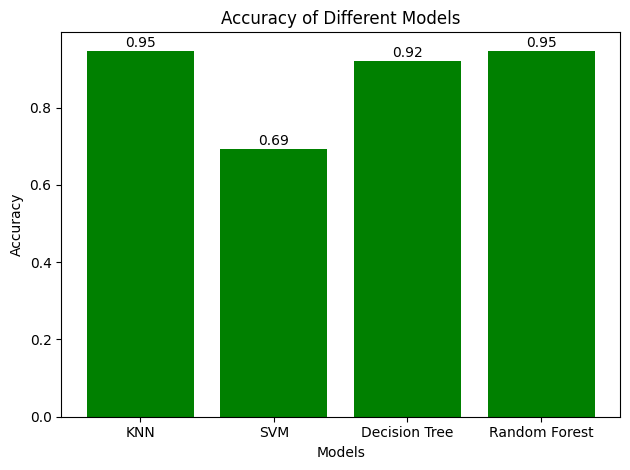

In [48]:
model_names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest']
accuracy_values = [knn_accuracy , svm_accuracy, dt_accuracy, rf_accuracy]

plt.bar(model_names, accuracy_values, color='green')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Display the accuracy values on top of the bars
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

# Show the plot
plt.tight_layout()
plt.show()


**self note**
---
classifier used:
---
    KNN 
    Random Forest (100 estimator / 100 trees in a forest) // Best model here
    Decision Tree (max_depth=100 / limit how deep the tree grow)
    SVM (need to weight balanace otherwise precision and recall becomes 0)
    